In [1]:
%matplotlib inline

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization

from tensorflow.keras.optimizers import Adam
 
from tensorflow.keras.callbacks import TensorBoard

# Training and Improving Neural Networks
## Live Demos

In [5]:
(attributes_train, labels_train), (attributes_test, labels_test) = fashion_mnist.load_data()

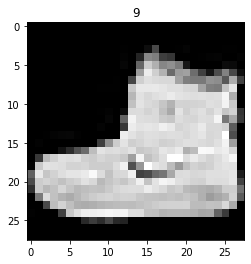

In [10]:
plt.imshow(attributes_train[0], cmap = "gray")
plt.title(labels_train[0])
plt.show()

In [11]:
attributes_train = attributes_train / 255.0
attributes_test = attributes_test / 255.0

In [15]:
input_shape = attributes_train[0].shape

In [12]:
set(labels_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [61]:
tf.keras.backend.clear_session()

In [62]:
model = Sequential([
    Input(shape = input_shape),
    Flatten(),
    # Dropout(0.1), # a Dropout after Flatten is in essense feature selection
    Dense(units = 128, activation = "relu"),
    Dropout(0.25),
    BatchNormalization(),
    Dense(units = 64, activation = "relu"),
    Dropout(0.1),
    Dense(units = 64, activation = "relu"),
    Dropout(0.1),
    BatchNormalization(),
    Dense(units = 32, activation = "relu"),
    Dense(units = 10, activation = "softmax")
])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

In [64]:
model.compile(
    loss = "sparse_categorical_crossentropy", 
    optimizer = Adam(),
    metrics = ["accuracy"]
)

In [65]:
model.fit(attributes_train, labels_train, epochs = 50, callbacks = [TensorBoard()])

Epoch 1/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6935 - accuracy: 0.7488
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5497 - accuracy: 0.8014
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5073 - accuracy: 0.8163
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4874 - accuracy: 0.8226
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4779 - accuracy: 0.8296
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4702 - accuracy: 0.8305
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4560 - accuracy: 0.8363
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4526 - accuracy: 0.8373
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4438 - accuracy: 0.8390
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.439

In [41]:
model.layers[1].kernel

<tf.Variable 'dense_5/kernel:0' shape=(784, 128) dtype=float32, numpy=
array([[-0.04428324, -0.02362998, -0.11377332, ...,  0.07760007,
        -0.25486162, -0.07160425],
       [ 0.00903537, -0.12105952,  0.6451911 , ..., -0.01792034,
         0.31041184, -0.07437824],
       [-0.1553001 , -0.1456448 , -0.22247952, ...,  0.11467721,
        -0.03710821, -0.54700047],
       ...,
       [ 0.46151948, -0.02325548,  1.0216516 , ...,  0.66625917,
        -0.02326195, -0.20310171],
       [ 0.21241881,  0.3398304 , -0.9313705 , ..., -0.16191219,
         0.1566859 , -0.3989413 ],
       [ 0.10404851,  0.42009327,  0.74788547, ..., -0.1854205 ,
         0.5616636 ,  0.18447314]], dtype=float32)>

In [42]:
model.layers[1].bias

<tf.Variable 'dense_5/bias:0' shape=(128,) dtype=float32, numpy=
array([-0.11732363, -0.32994398,  0.14684403,  0.5436539 ,  0.34859312,
       -0.01843242, -0.18660839,  0.14272782, -0.65551955,  0.05913848,
       -0.343842  , -0.82013893, -0.6066965 ,  0.43494913,  0.18758993,
       -1.7129738 ,  0.6127646 ,  0.53632045, -0.40659484,  0.47427616,
        0.37622002, -0.8055073 ,  0.11969191, -0.02902803, -0.6114823 ,
       -0.44006446,  0.7902905 ,  0.24331431, -0.18405665,  0.22624357,
       -1.7018285 , -0.30132046,  1.0017009 , -0.17083266,  0.12991926,
        0.7270015 ,  0.7421137 , -0.03305287, -1.3993227 ,  0.0458122 ,
       -0.39729157, -0.11545943, -0.01425794,  0.6762024 ,  0.68747044,
       -0.8188055 , -1.6809496 ,  0.23235543,  0.29382712, -0.01619927,
        0.4659223 ,  0.2803763 ,  0.40806505,  0.26486915, -1.1840148 ,
       -0.03895121,  0.30673516,  0.13169931,  0.89355797, -0.18491352,
       -0.6553639 , -0.10415539,  0.2553952 , -0.01626834, -1.310621  ,

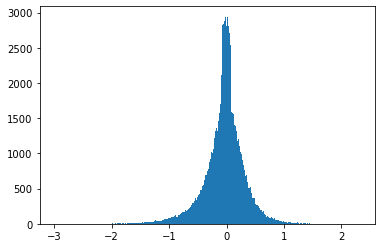

In [46]:
plt.hist(model.layers[1].kernel.numpy().ravel(), bins = "fd")
plt.show()

In [70]:
activation_demo_model = Model(inputs = [model.input], outputs = [model.layers[4].output])

In [71]:
activations_4_layer = activation_demo_model.predict(attributes_train[:10])

In [72]:
sorted(activations_4_layer[0])

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.5722515,
 1.2949402,
 1.7291209,
 1.8452313,
 1.931716,
 1.9369735,
 2.0107946,
 2.3740575,
 2.6325421,
 2.8531597,
 3.3027158,
 3.359501,
 3.36793,
 3.8440082,
 4.553312,
 4.7731595]

In [73]:
activations_4_layer[:, 45]

array([0.        , 2.9051206 , 1.3673755 , 0.6985105 , 0.        ,
       2.125379  , 0.80694413, 0.5746973 , 0.        , 0.        ],
      dtype=float32)